# Neural Network (Multi-Layer Perceptron)

In [ ]:
import sys
sys.path.append("../src")

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms

from rice_ml.supervised_learning.neural_network import NeuralNetwork
from rice_ml.supervised_learning.preprocess import flatten_images

#from tensorflow.keras.datasets import fashion_mnist

sns.set_theme()

### Loading and preparing the dataset

A Neural networks is a machine learning models that can learn complex, nonlinear relationships between inputs and outputs by combining layers of interconnected neurons. Each neuron applies a weighted transformation followed by an activation function, allowing the network to capture patterns that go beyond what a single linear model can represent. During training, neural networks adjust their weights using optimization algorithms like stochastic gradient descent to minimize a chosen loss function, such as mean squared error for regression or cross-entropy for classification.

Here, we apply a neural network on the fashion-MNIST dataset, which consists of images of fashion items from 10 different categories. Where a single neuron would be unable to draw a boundary correctly seperating all 10 categories, this is a task that is well suited for a multi-layer perceptron.

Train images: (60000, 28, 28)
Test images: (10000, 28, 28)


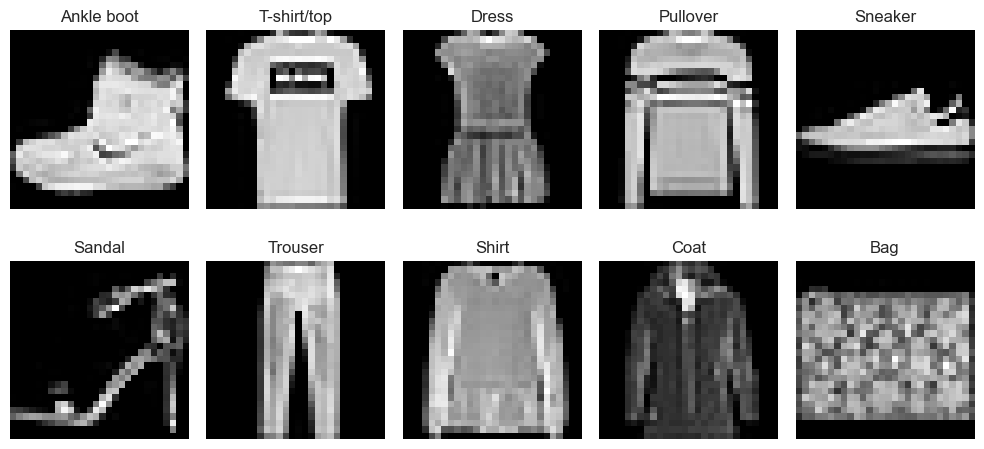

In [3]:
# Load our dataset
train_dataset = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor()  # converts images to PyTorch tensors, scaled to [0,1]
)

test_dataset = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

# Extract numpy arrays for visualization or preprocessing
train_images = train_dataset.data.numpy()       # shape (60000, 28, 28)
train_labels = train_dataset.targets.numpy()    # shape (60000,)
test_images = test_dataset.data.numpy()         # shape (10000, 28, 28)
test_labels = test_dataset.targets.numpy()      # shape (10000,)

print("Train images:", train_images.shape)
print("Test images:", test_images.shape)

# Define label names
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Display one sample image for each of the 10 categories
plt.figure(figsize=(10, 5))

shown_labels = set()

i = 0
for idx, label in enumerate(train_labels):
    if label not in shown_labels:
        shown_labels.add(label)
        plt.subplot(2, 5, len(shown_labels))
        plt.imshow(train_images[idx], cmap="gray")
        plt.title(class_names[label])
        plt.axis("off")
    if len(shown_labels) == 10:
        break

plt.tight_layout()
plt.show()

The above are sample images of the data contained in our fashion-MNIST dataset—one of each category. Each observation is a greyscale image of a fashion item.

Note that the dataset is already split into training (60,000 observations) and testing (10,000 observations) data. As such, we can skip the preprocessing step of splitting the dataset that we have done in other algorithm applications.